In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns

In [223]:
# 엑셀 파일 불러오기
#df = pd.read_excel('C:/Users/gk571/OneDrive/바탕 화면/NCSU/AHU-1 OaRh.xlsx')
df2 = pd.read_excel('C:/Users/gk571/OneDrive/바탕 화면/NCSU/최신.xlsx')

In [224]:
df2.set_index('Time stamp', inplace=True)

In [218]:
# 'Time stamp' 열을 datetime 객체로 변환
df['Time stamp'] = pd.to_datetime(df['Time stamp'])

df['Date'] = df.iloc[:, 0].dt.floor('H')  # 시간까지만 취함
earliest_time = df.groupby('Date').first().reset_index()

earliest_time['Date'] = earliest_time['Date'].dt.floor('H')
earliest_time.drop('Time stamp', axis=1, inplace=True)

earliest_time.rename(columns={'Date': 'Time stamp'}, inplace=True)
earliest_time.set_index('Time stamp', inplace=True)

In [219]:
df_set = df2.join(earliest_time, how='outer')

ValueError: columns overlap but no suffix specified: Index(['AHU-1 OaRh'], dtype='object')

In [225]:
# 시작 날짜와 종료 날짜 설정
start_date = '2023-10-01'
end_date = '2023-12-25'

# 조건에 맞는 데이터 필터링
filtered_df = df_set.loc[start_date:end_date]

In [226]:
# 데이터프레임의 열 이름 가져오기
column_names = filtered_df.columns.tolist()

# 열 이름과 순서 번호 함께 출력
column_names_with_index = [(i, name) for i, name in enumerate(column_names)]
column_names_with_index

[(0, 'AHU-3 AvgCcoilTmp'),
 (1, 'AHU-3 AvgDifPr'),
 (2, 'AHU-3 AvgMaTmp'),
 (3, 'AHU-3 AvgPhtTmp'),
 (4, 'AHU-3 ChwEnTmp'),
 (5, 'AHU-3 ChwVlvPos'),
 (6, 'AHU-3 ClgTmp1'),
 (7, 'AHU-3 ClgTmp2'),
 (8, 'AHU-3 EaDprPos'),
 (9, 'AHU-3 EaStPr'),
 (10, 'AHU-3 EaTmp'),
 (11, 'AHU-3 EconMd'),
 (12, 'AHU-3 FnFilDifPr'),
 (13, 'AHU-3 HrDifPr'),
 (14, 'AHU-3 HrEaBypDprPos'),
 (15, 'AHU-3 HrEaFaDprPos'),
 (16, 'AHU-3 HrOaBypDprPos'),
 (17, 'AHU-3 HrOaFaDprPos'),
 (18, 'AHU-3 HrwClgMd'),
 (19, 'AHU-3 HrwCmd'),
 (20, 'AHU-3 HrwHtgMd'),
 (21, 'AHU-3 HrwSpd'),
 (22, 'AHU-3 HrwSts'),
 (23, 'AHU-3 Lvl2DifPr'),
 (24, 'AHU-3 Lvl3DifPr'),
 (25, 'AHU-3 MaRh'),
 (26, 'AHU-3 MaTmp1'),
 (27, 'AHU-3 MaTmp2'),
 (28, 'AHU-3 OaDprFbk'),
 (29, 'AHU-3 OaDprPos'),
 (30, 'AHU-3 OaFl'),
 (31, 'AHU-3 OaTmp'),
 (32, 'AHU-3 PhtBypDprPos'),
 (33, 'AHU-3 PhtDifPr'),
 (34, 'AHU-3 PhtTmp1'),
 (35, 'AHU-3 PhtTmp2'),
 (36, 'AHU-3 PhtVlvPos'),
 (37, 'AHU-3 PreFilDifPr'),
 (38, 'AHU-3 RaDprPos'),
 (39, 'AHU-3 RaFanACmd'),
 (40, '

In [227]:
# 선택된 열 이름
selected_columns = [filtered_df.columns[74], filtered_df.columns[31], filtered_df.columns[2], filtered_df.columns[3], filtered_df.columns[57], filtered_df.columns[73], filtered_df.columns[79], filtered_df.columns[25], filtered_df.columns[52], filtered_df.columns[29], filtered_df.columns[5], filtered_df.columns[36], filtered_df.columns[79],filtered_df.columns[29],
                    filtered_df.columns[37], filtered_df.columns[22], filtered_df.columns[28], filtered_df.columns[5]]

# 데이터 선택
selected_data = filtered_df[selected_columns]

# 각 선택된 열에 대해 숫자로 변환할 수 없는 값들의 위치 찾기
non_numeric_positions = {}
for column in selected_columns:
    non_numeric_positions[column] = filtered_df[column].apply(lambda x: not isinstance(x, (int, float)))

# 숫자로 변환할 수 없는 값들의 위치 확인
non_numeric_indices = {column: filtered_df[non_numeric_positions[column]].index.tolist() for column in non_numeric_positions}
non_numeric_indices

{'AHU-3 SaTmpRstSpt': [Timestamp('2023-11-05 01:00:00')],
 'AHU-3 OaTmp': [Timestamp('2023-11-05 01:00:00')],
 'AHU-3 AvgMaTmp': [Timestamp('2023-11-05 01:00:00')],
 'AHU-3 AvgPhtTmp': [Timestamp('2023-11-05 01:00:00')],
 'AHU-3 RaTmp3': [Timestamp('2023-11-05 01:00:00')],
 'AHU-3 SaTmp': [Timestamp('2023-11-05 01:00:00')],
 'AHU-1 OaRh': [],
 'AHU-3 MaRh': [Timestamp('2023-11-05 01:00:00')],
 'AHU-3 RaRh1': [Timestamp('2023-11-05 01:00:00')],
 'AHU-3 OaDprPos': [],
 'AHU-3 ChwVlvPos': [Timestamp('2023-11-05 01:00:00')],
 'AHU-3 PhtVlvPos': [Timestamp('2023-11-05 01:00:00')],
 'AHU-3 PreFilDifPr': [Timestamp('2023-11-05 01:00:00')],
 'AHU-3 HrwSts': [Timestamp('2023-11-05 01:00:00')],
 'AHU-3 OaDprFbk': [Timestamp('2023-11-05 01:00:00')]}

In [228]:
selected_data = selected_data.drop(pd.Timestamp('2023-11-05 01:00:00'))

In [229]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2063 entries, 2023-10-01 00:00:00 to 2023-12-25 23:00:00
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AHU-3 SaTmpRstSpt  2063 non-null   object 
 1   AHU-3 OaTmp        2063 non-null   object 
 2   AHU-3 AvgMaTmp     2063 non-null   object 
 3   AHU-3 AvgPhtTmp    2063 non-null   object 
 4   AHU-3 RaTmp3       2063 non-null   object 
 5   AHU-3 SaTmp        2063 non-null   object 
 6   AHU-1 OaRh         2063 non-null   float64
 7   AHU-3 MaRh         2063 non-null   object 
 8   AHU-3 RaRh1        2063 non-null   object 
 9   AHU-3 OaDprPos     1156 non-null   float64
 10  AHU-3 ChwVlvPos    2063 non-null   object 
 11  AHU-3 PhtVlvPos    2063 non-null   object 
 12  AHU-1 OaRh         2063 non-null   float64
 13  AHU-3 OaDprPos     1156 non-null   float64
 14  AHU-3 PreFilDifPr  2063 non-null   object 
 15  AHU-3 HrwSts       360 non-null    o

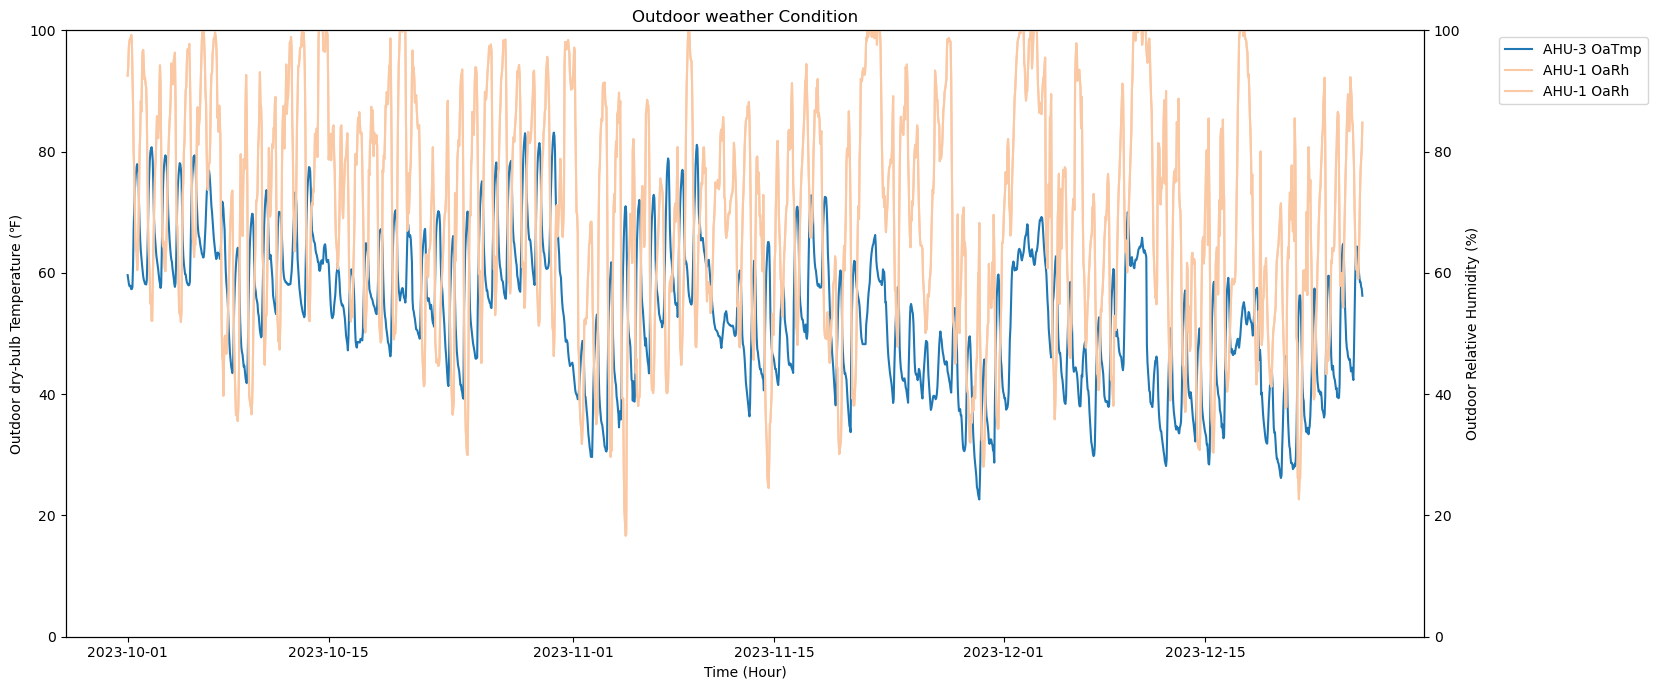

In [230]:
fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.plot(selected_data.index, selected_data['AHU-3 OaTmp'], label='AHU-3 OaTmp', linestyle='-', color='#1f77b4')

ax1.set_xlabel('Time (Hour)')
ax1.set_ylabel('Outdoor dry-bulb Temperature (℉)')
ax1.tick_params(axis='y')
ax1.set_ylim(0, 100)

# 두 번째 y축 (오른쪽) 설정 및 'C' 열 그래프 그리기
ax2 = ax1.twinx()
#ax2.plot(selected_data.index, selected_data['AHU-3 OaDprPos'], label='AHU-3 OaDprPos', linestyle='-', color='#bcbcbc')
ax2.plot(selected_data.index, selected_data['AHU-1 OaRh'], label='AHU-1 OaRh', linestyle='-', color='#fbc8a4') #Ou
ax2.set_ylabel('Outdoor Relative Humidity (%)')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, 100)

# 그래프 제목 및 범례 설정
plt.title("ABCD Data Plot with Dual Y-Axis")
fig.tight_layout()  # 그래프 레이아웃 조정

# 범례 추가를 위한 준비
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# 범례 표시 (이 부분을 수정)
plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05,1))

plt.title("Outdoor weather Condition")
plt.xlabel("Time (Hour)")

plt.show()

In [183]:
# 특정 날짜에 해당하는 행 필터링
specific_date = '2023-12-19 00:00'
specific_date2 = '2023-12-25 23:00'

row_number_1219 = selected_data.index.get_loc(specific_date)
row_number_1225 = selected_data.index.get_loc(specific_date2)

print(row_number_1219, row_number_1225)

1895 2062


In [184]:
# 특정 날짜에 해당하는 행 필터링
specific_date3 = '2023-12-01 00:00'
specific_date4 = '2023-12-07 23:00'

row_number_1201 = selected_data.index.get_loc(specific_date3)
row_number_1207 = selected_data.index.get_loc(specific_date4)

print(row_number_1201, row_number_1207)

1463 1630


0 743


Text(0.5, 47.7222222222222, 'Time (Month-Day)')

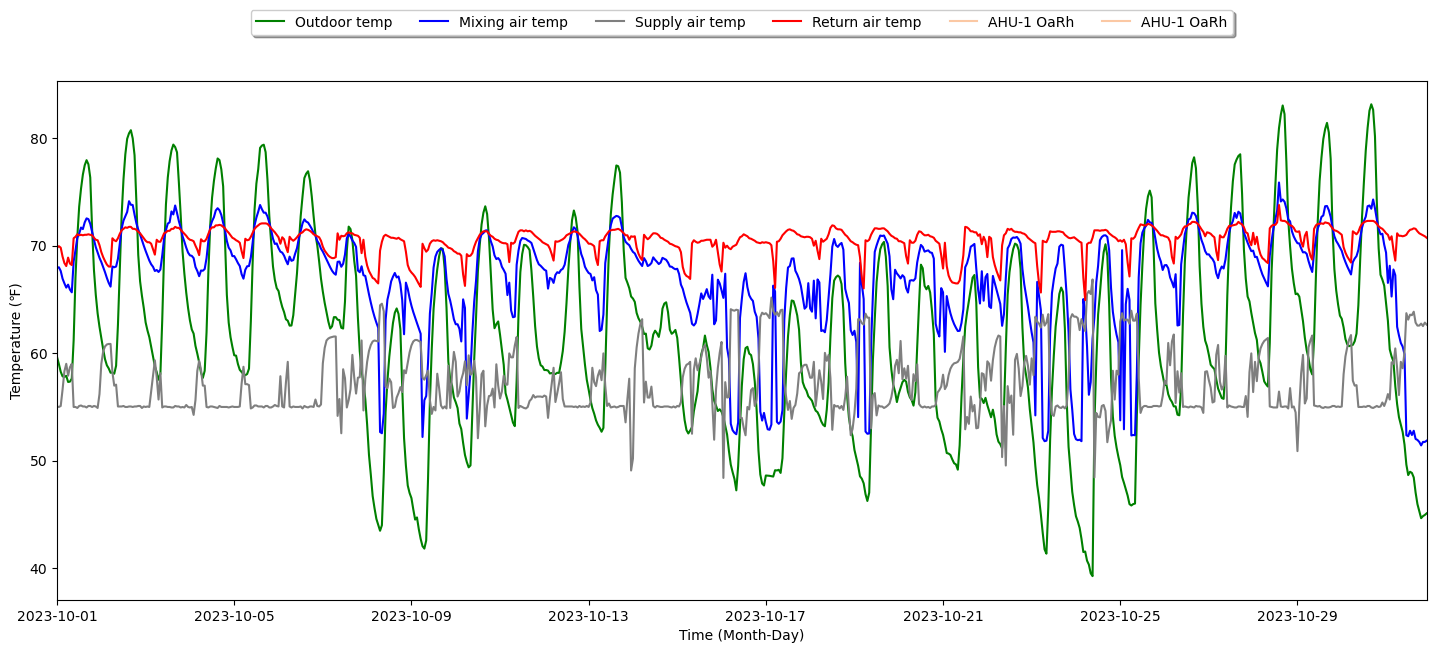

In [231]:
# 특정 날짜에 해당하는 행 필터링
specific_date5 = '2023-10-01 00:00'
specific_date6 = '2023-10-31 23:00'

row_number_1001 = selected_data.index.get_loc(specific_date5)
row_number_1031 = selected_data.index.get_loc(specific_date6)

print(row_number_1001, row_number_1031)

selected_data_october = selected_data.iloc[row_number_1001:row_number_1031]

fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.plot(selected_data_october.index, selected_data_october['AHU-3 OaTmp'], label='Outdoor temp', linestyle='-', color='green') #외기온도
ax1.plot(selected_data_october.index, selected_data_october['AHU-3 AvgMaTmp'], label='Mixing air temp', linestyle='-', color='blue') #혼합온도  
ax1.plot(selected_data_october.index, selected_data_october['AHU-3 SaTmp'], label='Supply air temp', linestyle='-', color='#7f7f7f') #급기온도
ax1.plot(selected_data_october.index, selected_data_october['AHU-3 RaTmp3'], label='Return air temp', linestyle='-', color='red') #환기온도


ax1.set_ylabel('Temperature (℉)')
ax1.tick_params(axis='y')
#ax1.set_ylim(0, 100)
ax1.set_xlim(selected_data_october.index.min(), selected_data_october.index.max())


# 범례 추가를 위한 준비
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# 범례 표시 (이 부분을 수정)
plt.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=len(labels))

plt.tight_layout(pad=3)
#plt.title("AHU-3 (10/1 - 10/31)")
plt.xlabel("Time (Month-Day)")

In [186]:
# 특정 날짜에 해당하는 행 필터링
specific_date7 = '2023-11-01 00:00'
specific_date8 = '2023-11-30 23:00'

row_number_1101 = selected_data.index.get_loc(specific_date7)
row_number_1130 = selected_data.index.get_loc(specific_date8)

print(row_number_1101, row_number_1130)

744 1462


744 1462


Text(0.5, 47.7222222222222, 'Time (Month-Day)')

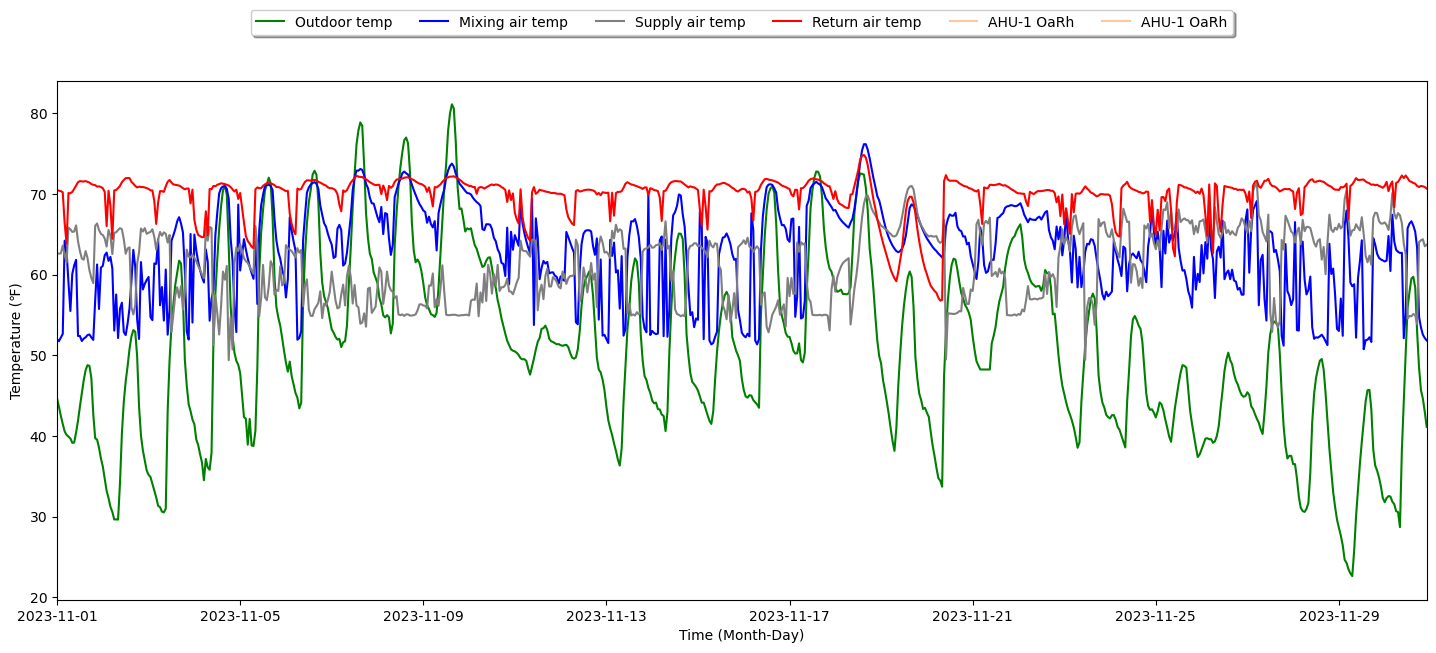

In [187]:
# 특정 날짜에 해당하는 행 필터링
specific_date7 = '2023-11-01 00:00'
specific_date8 = '2023-11-30 23:00'

row_number_1101 = selected_data.index.get_loc(specific_date7)
row_number_1130 = selected_data.index.get_loc(specific_date8)

print(row_number_1101, row_number_1130)

selected_data_november = selected_data.iloc[row_number_1101:row_number_1130]

fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.plot(selected_data_november.index, selected_data_november['AHU-3 OaTmp'], label='Outdoor temp', linestyle='-', color='green') #외기온도
ax1.plot(selected_data_november.index, selected_data_november['AHU-3 AvgMaTmp'], label='Mixing air temp', linestyle='-', color='blue') #혼합온도  
ax1.plot(selected_data_november.index, selected_data_november['AHU-3 SaTmp'], label='Supply air temp', linestyle='-', color='#7f7f7f') #급기온도
ax1.plot(selected_data_november.index, selected_data_november['AHU-3 RaTmp3'], label='Return air temp', linestyle='-', color='red') #환기온도


ax1.set_ylabel('Temperature (℉)')
ax1.tick_params(axis='y')
#ax1.set_ylim(0, 100)
ax1.set_xlim(selected_data_november.index.min(), selected_data_november.index.max())


# 범례 추가를 위한 준비
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# 범례 표시 (이 부분을 수정)
plt.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=len(labels))

plt.tight_layout(pad=3)
#plt.title("AHU-3 (10/1 - 10/31)")
plt.xlabel("Time (Month-Day)")

744 1462


Text(0.5, 47.7222222222222, 'Time (Month-Day)')

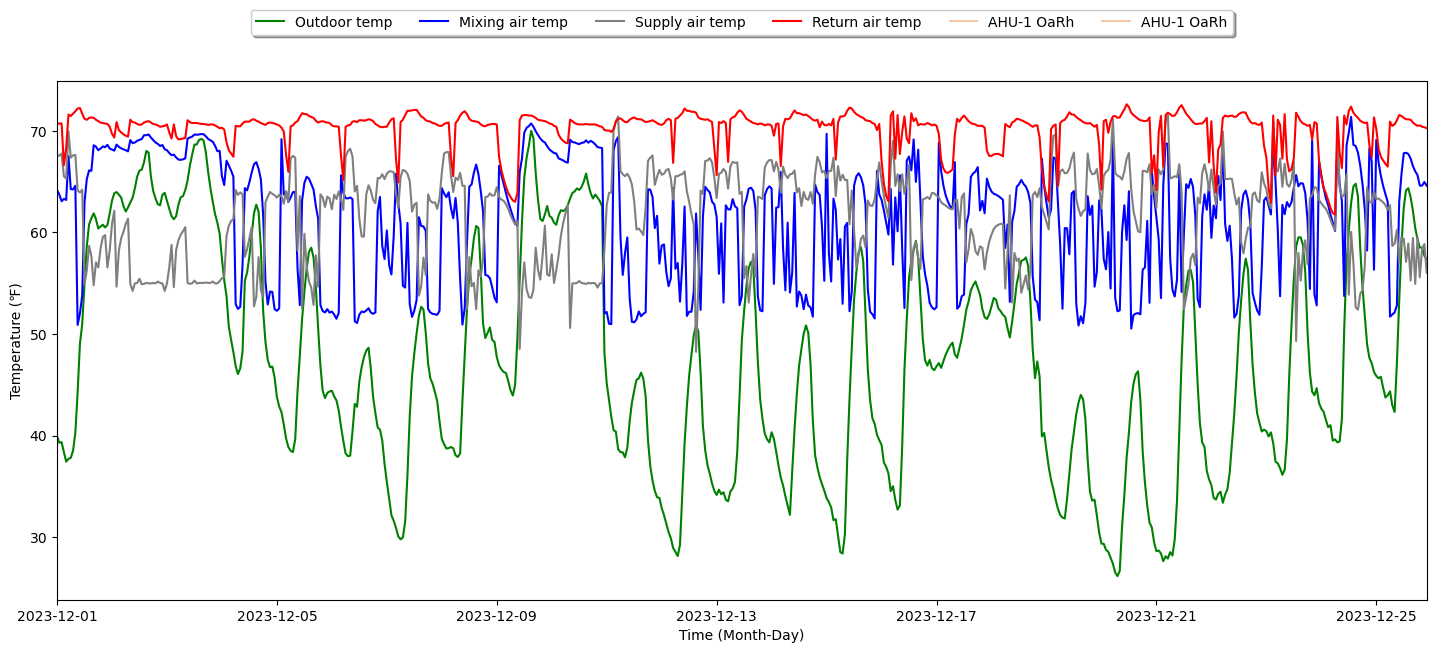

In [188]:
# 특정 날짜에 해당하는 행 필터링
specific_date9 = '2023-12-01 00:00'
specific_date10 = '2023-12-25 23:00'

row_number_1201 = selected_data.index.get_loc(specific_date9)
row_number_1225 = selected_data.index.get_loc(specific_date10)

print(row_number_1101, row_number_1130)

selected_data_december = selected_data.iloc[row_number_1201:row_number_1225]

fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.plot(selected_data_december.index, selected_data_december['AHU-3 OaTmp'], label='Outdoor temp', linestyle='-', color='green') #외기온도
ax1.plot(selected_data_december.index, selected_data_december['AHU-3 AvgMaTmp'], label='Mixing air temp', linestyle='-', color='blue') #혼합온도  
ax1.plot(selected_data_december.index, selected_data_december['AHU-3 SaTmp'], label='Supply air temp', linestyle='-', color='#7f7f7f') #급기온도
ax1.plot(selected_data_december.index, selected_data_december['AHU-3 RaTmp3'], label='Return air temp', linestyle='-', color='red') #환기온도


ax1.set_ylabel('Temperature (℉)')
ax1.tick_params(axis='y')
#ax1.set_ylim(0, 100)
ax1.set_xlim(selected_data_december.index.min(), selected_data_december.index.max())


# 범례 추가를 위한 준비
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# 범례 표시 (이 부분을 수정)
plt.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=len(labels))

plt.tight_layout(pad=3)
#plt.title("AHU-3 (10/1 - 10/31)")
plt.xlabel("Time (Month-Day)")

744 1462


Text(0.5, 0, 'Time (Month-Day)')

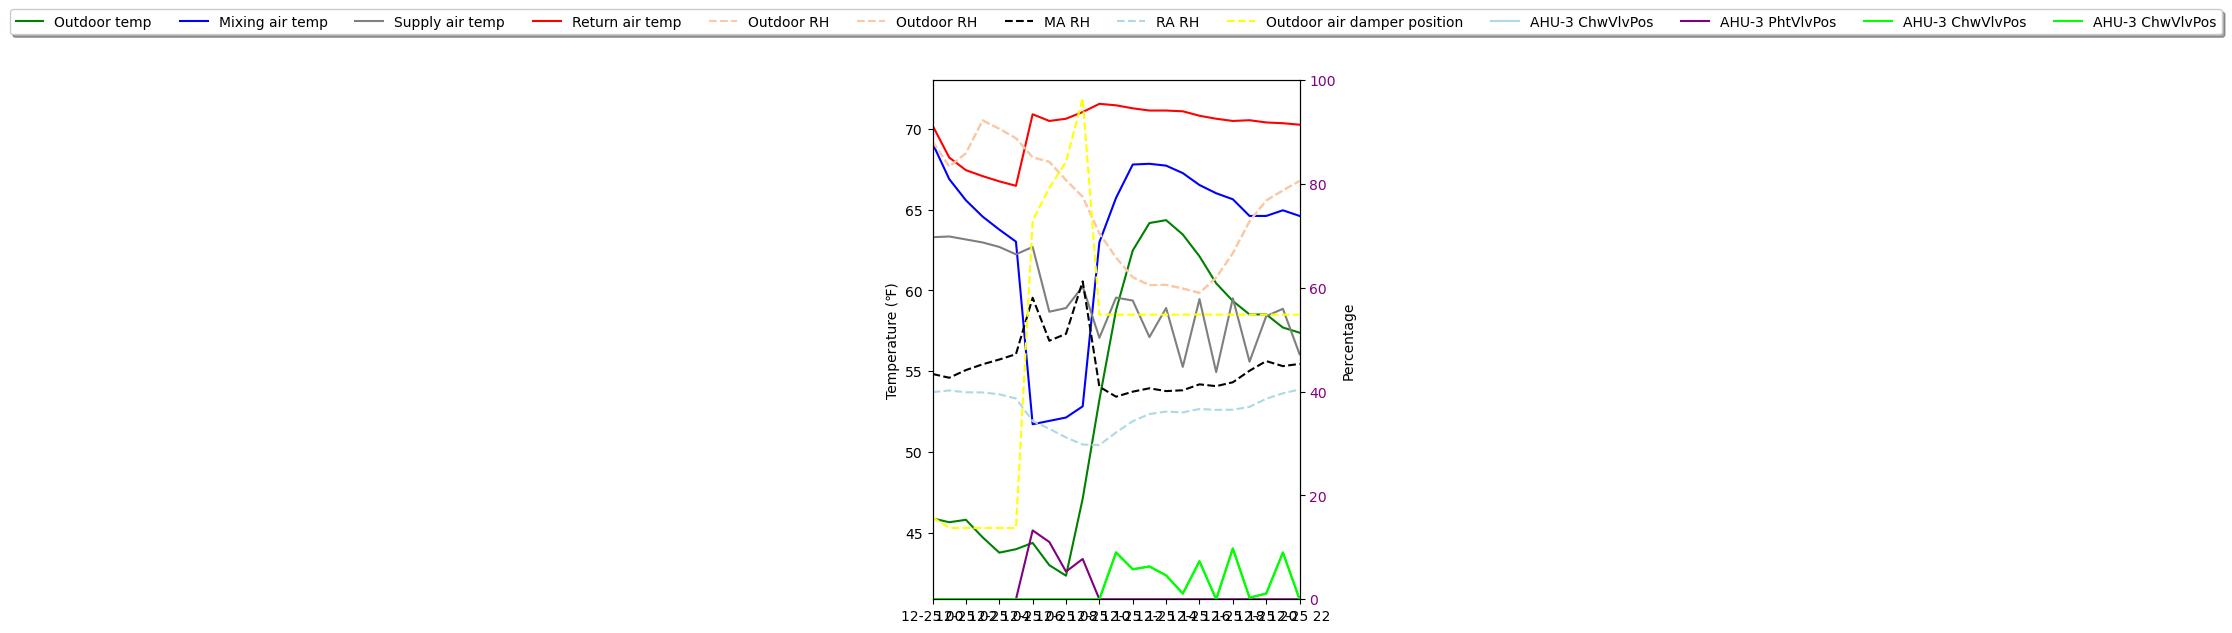

In [202]:

# 특정 날짜에 해당하는 행 필터링
specific_date9 = '2023-12-25 00:00'
specific_date10 = '2023-12-25 23:00'

row_number_1201 = selected_data.index.get_loc(specific_date9)
row_number_1225 = selected_data.index.get_loc(specific_date10)

print(row_number_1101, row_number_1130)

selected_data_december = selected_data.iloc[row_number_1201:row_number_1225]

fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.plot(selected_data_december.index, selected_data_december['AHU-3 OaTmp'], label='Outdoor temp', linestyle='-', color='green') #외기온도
ax1.plot(selected_data_december.index, selected_data_december['AHU-3 AvgMaTmp'], label='Mixing air temp', linestyle='-', color='blue') #혼합온도  
ax1.plot(selected_data_december.index, selected_data_december['AHU-3 SaTmp'], label='Supply air temp', linestyle='-', color='#7f7f7f') #급기온도
ax1.plot(selected_data_december.index, selected_data_december['AHU-3 RaTmp3'], label='Return air temp', linestyle='-', color='red') #환기온도


ax2 = ax1.twinx()
ax2.plot(selected_data_december.index, selected_data_december['AHU-1 OaRh'], label='Outdoor RH', linestyle='--', color='#fbc8a4') #외기습도
ax2.plot(selected_data_december.index, selected_data_december['AHU-3 MaRh'], label='MA RH', linestyle='--', color='black') #혼합공기 습도
ax2.plot(selected_data_december.index, selected_data_december['AHU-3 RaRh1'], label='RA RH', linestyle='--', color='#add8e6') #환기공기 습도
ax2.plot(selected_data_december.index, selected_data_december['AHU-3 OaDprFbk'], label='Outdoor air damper position', linestyle='--', color='yellow') #외기댐퍼 개도율
ax2.plot(selected_data_december.index, selected_data_december['AHU-3 HrwSts'], label='AHU-3 ChwVlvPos', linestyle='-', color='#add8e6') #휠운전상태
ax2.plot(selected_data_december.index, selected_data_december['AHU-3 PhtVlvPos'], label='AHU-3 PhtVlvPos', linestyle='-', color='purple') #난방밸브개도율
ax2.plot(selected_data_december.index, selected_data_december['AHU-3 ChwVlvPos'], label='AHU-3 ChwVlvPos', linestyle='-', color='lime') #냉방밸브개도율

ax2.set_ylabel('Percentage (%)')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylim(0, 100)


ax1.set_ylabel('Temperature (℉)')
ax1.tick_params(axis='y')
#ax1.set_ylim(0, 100)
ax1.set_xlim(selected_data_december.index.min(), selected_data_december.index.max())


# 범례 추가를 위한 준비
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# 범례 표시 (이 부분을 수정)
plt.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=len(labels))

plt.tight_layout(pad=3)
#plt.title("AHU-3 (10/1 - 10/31)")
plt.xlabel("Time (Month-Day)")

744 1462


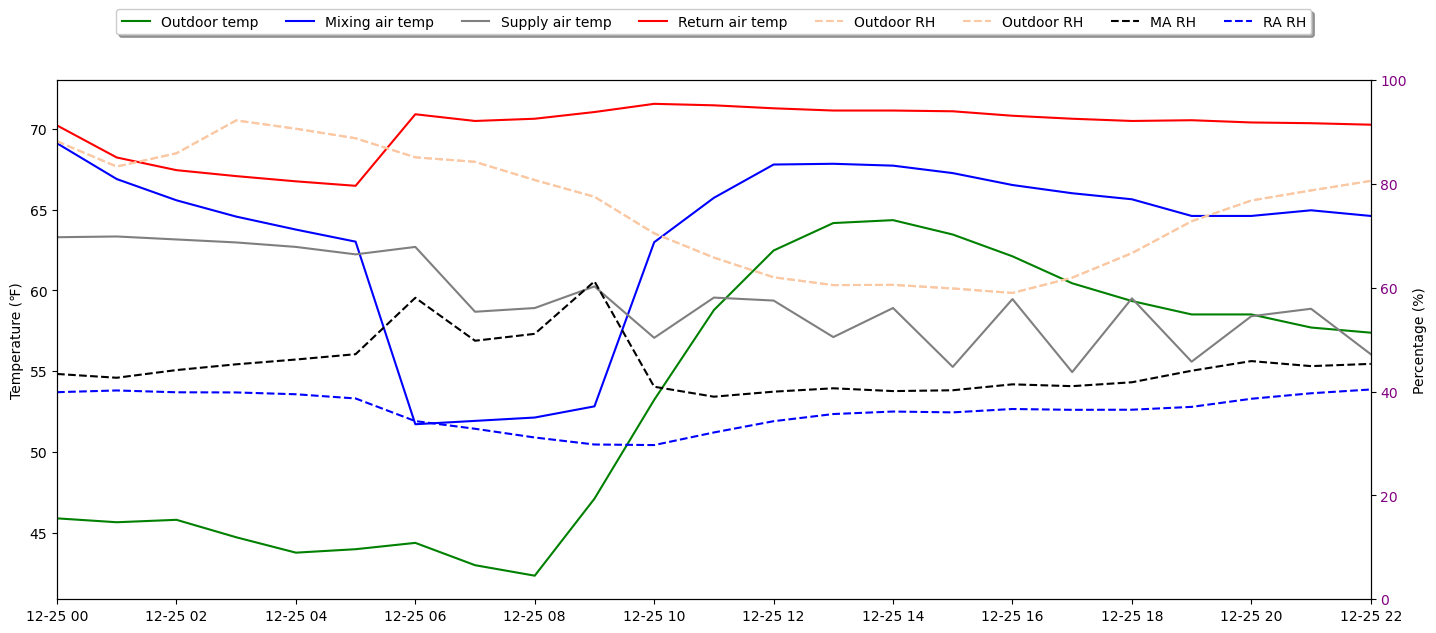

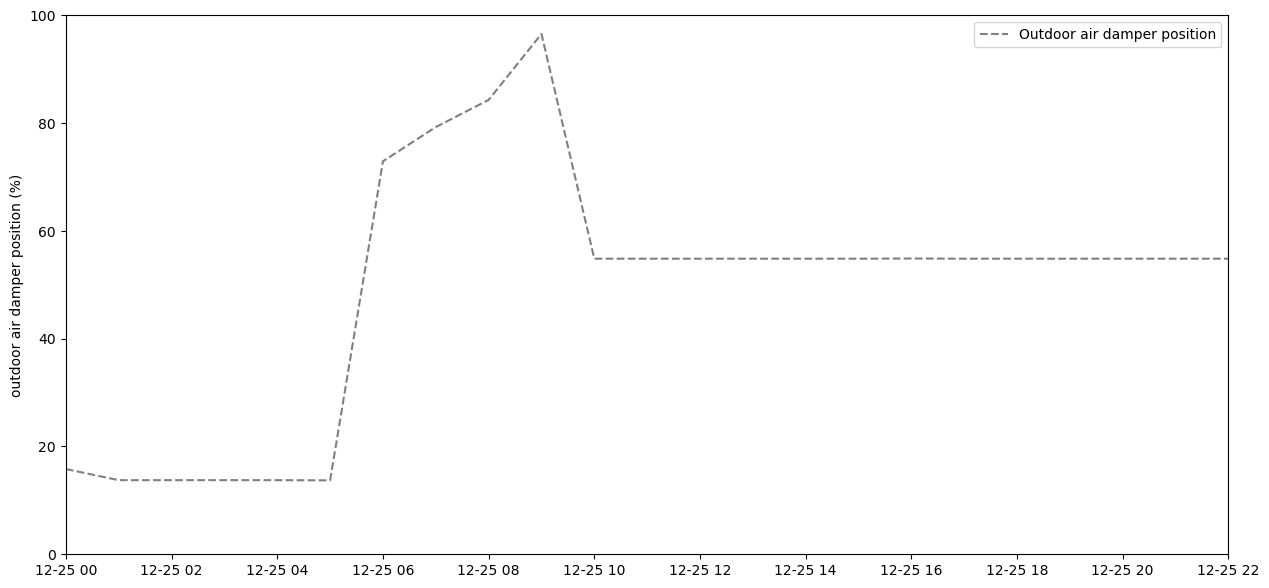

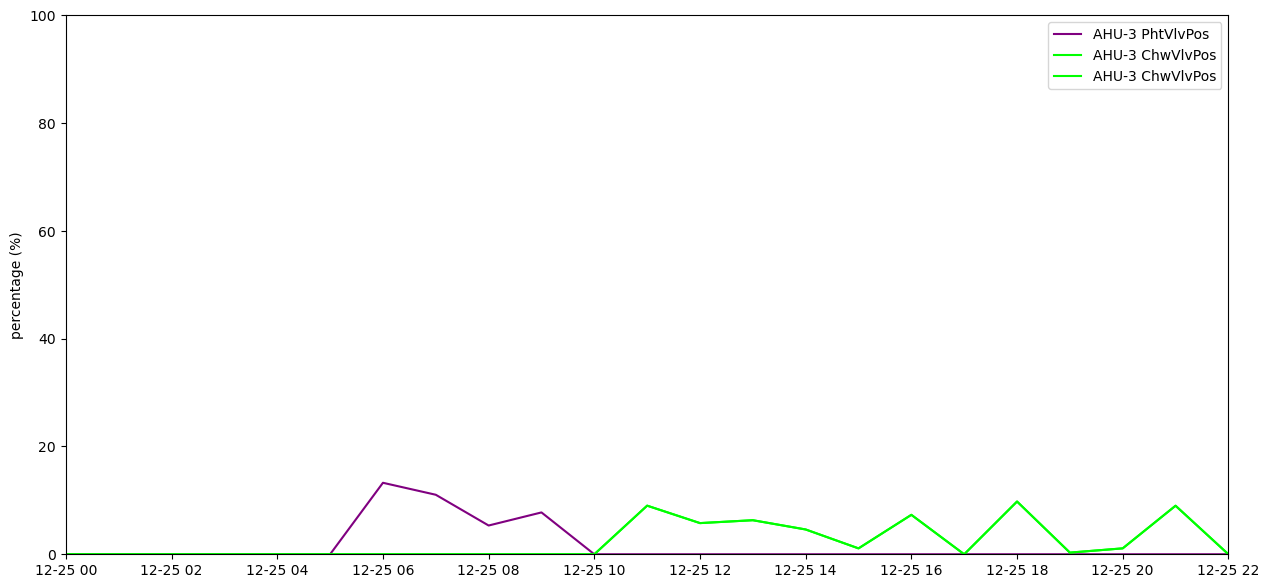

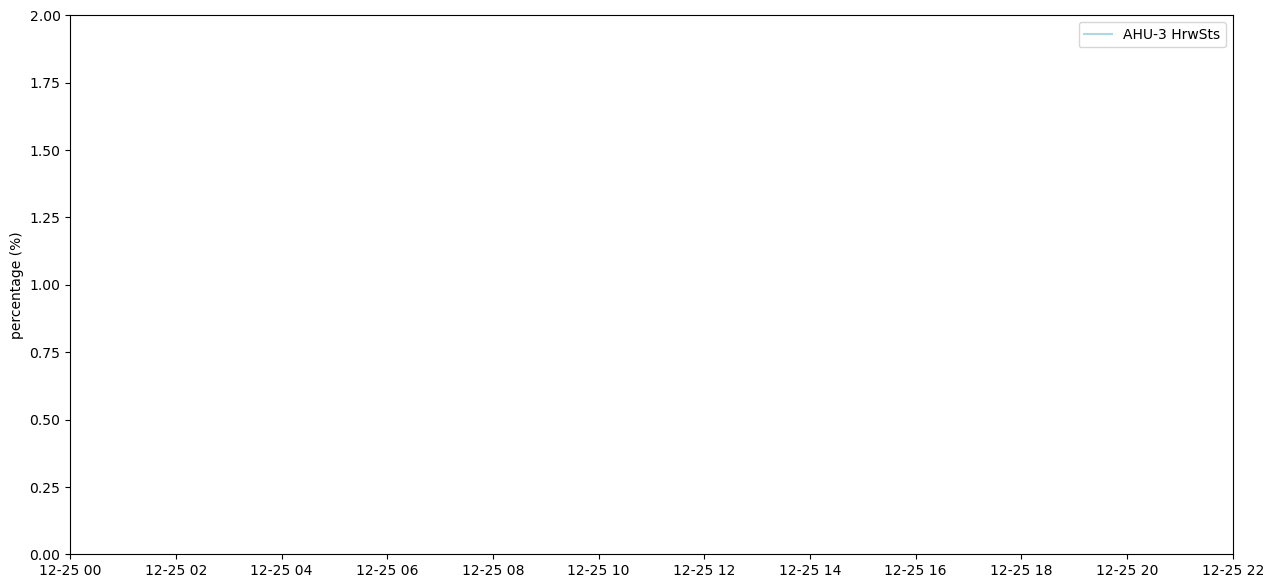

In [203]:
# 특정 날짜에 해당하는 행 필터링
specific_date9 = '2023-12-25 00:00'
specific_date10 = '2023-12-25 23:00'

row_number_1201 = selected_data.index.get_loc(specific_date9)
row_number_1225 = selected_data.index.get_loc(specific_date10)

print(row_number_1101, row_number_1130)

selected_data_december = selected_data.iloc[row_number_1201:row_number_1225]

fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.plot(selected_data_december.index, selected_data_december['AHU-3 OaTmp'], label='Outdoor temp', linestyle='-', color='green') #외기온도
ax1.plot(selected_data_december.index, selected_data_december['AHU-3 AvgMaTmp'], label='Mixing air temp', linestyle='-', color='blue') #혼합온도  
ax1.plot(selected_data_december.index, selected_data_december['AHU-3 SaTmp'], label='Supply air temp', linestyle='-', color='#7f7f7f') #급기온도
ax1.plot(selected_data_december.index, selected_data_december['AHU-3 RaTmp3'], label='Return air temp', linestyle='-', color='red') #환기온도

ax2 = ax1.twinx()
ax2.plot(selected_data_december.index, selected_data_december['AHU-1 OaRh'], label='Outdoor RH', linestyle='--', color='#fbc8a4') #외기습도
ax2.plot(selected_data_december.index, selected_data_december['AHU-3 MaRh'], label='MA RH', linestyle='--', color='black') #혼합공기 습도
ax2.plot(selected_data_december.index, selected_data_december['AHU-3 RaRh1'], label='RA RH', linestyle='--', color='blue') #환기공기 습도

ax2.set_ylabel('Percentage (%)')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylim(0, 100)



ax1.set_ylabel('Temperature (℉)')
ax1.tick_params(axis='y')
#ax1.set_ylim(0, 100)
ax1.set_xlim(selected_data_december.index.min(), selected_data_december.index.max())


# 범례 추가를 위한 준비
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1 ,ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# 범례 표시 (이 부분을 수정)
plt.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=len(labels))

plt.tight_layout(pad=3)
#plt.title("AHU-3 (10/1 - 10/31)")
plt.xlabel("Time (Month-Day)")


# 기존 그래프를 그린 후,

# 새로운 subplot을 추가합니다.
fig, ax3 = plt.subplots(figsize=(15, 7))

# 새로운 축에 데이터를 그립니다.
ax3.plot(selected_data_december.index, selected_data_december['AHU-3 OaDprFbk'], label='Outdoor air damper position', linestyle='--', color='grey')

# 적절한 축 레이블, 범위, 범례 설정
ax3.set_ylabel('outdoor air damper position (%)')
ax3.set_xlim(selected_data_december.index.min(), selected_data_december.index.max())
ax3.legend(loc='best')
ax3.set_ylim(0, 100)

fig, ax4 = plt.subplots(figsize=(15, 7))

ax4.plot(selected_data_december.index, selected_data_december['AHU-3 PhtVlvPos'], label='AHU-3 PhtVlvPos', linestyle='-', color='purple')
ax4.plot(selected_data_december.index, selected_data_december['AHU-3 ChwVlvPos'], label='AHU-3 ChwVlvPos', linestyle='-', color='lime')
ax4.set_ylabel('percentage (%)')
ax4.set_xlim(selected_data_december.index.min(), selected_data_december.index.max())
ax4.legend(loc='best')
ax4.set_ylim(0, 100)


fig, ax5 = plt.subplots(figsize=(15, 7))
ax5.plot(selected_data_december.index, selected_data_december['AHU-3 HrwSts'], label='AHU-3 HrwSts', linestyle='-', color='#add8e6') #휠운전상태
ax5.set_ylabel('percentage (%)')
ax5.set_xlim(selected_data_december.index.min(), selected_data_december.index.max())
ax5.legend(loc='best')
ax5.set_ylim(0, 2)


plt.show()

In [190]:
print(selected_data_december.columns)


Index(['AHU-3 SaTmpRstSpt', 'AHU-3 OaTmp', 'AHU-3 AvgMaTmp', 'AHU-3 AvgPhtTmp',
       'AHU-3 RaTmp3', 'AHU-3 SaTmp', 'AHU-1 OaRh', 'AHU-3 MaRh',
       'AHU-3 RaRh1', 'AHU-3 OaDprPos', 'AHU-3 ChwVlvPos', 'AHU-3 PhtVlvPos',
       'AHU-1 OaRh', 'AHU-3 OaDprPos', 'AHU-3 PreFilDifPr', 'AHU-3 HrwSts',
       'AHU-3 OaDprFbk', 'AHU-3 ChwVlvPos'],
      dtype='object')


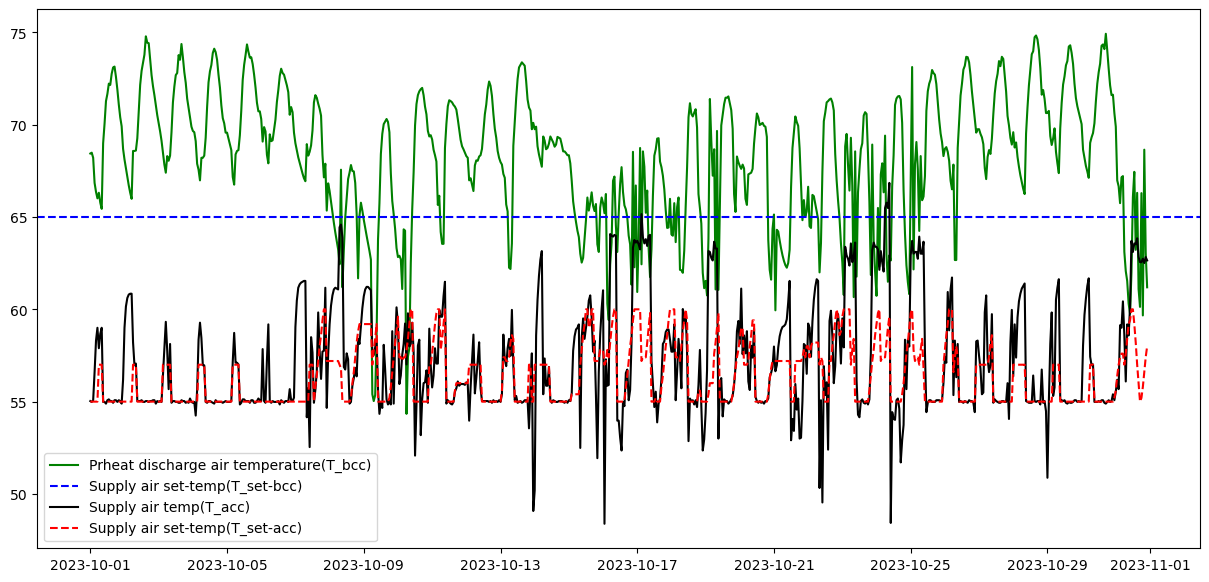

(19631.0, 19661.916666666668)

In [191]:
fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.plot(selected_data_october.index, selected_data_october['AHU-3 AvgPhtTmp'], label='Prheat discharge air temperature(T_bcc)', linestyle='-', color='green') #토출온도
ax1.axhline(y=65, color='blue', linestyle='--', label='Supply air set-temp(T_set-bcc)') #토출온도 설정온도
ax1.plot(selected_data_october.index, selected_data_october['AHU-3 SaTmp'], label='Supply air temp(T_acc)', linestyle='-', color='black') #급기온도
ax1.plot(selected_data_october.index, selected_data_october['AHU-3 SaTmpRstSpt'], label='Supply air set-temp(T_set-acc)', linestyle='--', color='red') #급기온도 설정온도

plt.legend()
plt.show()

ax1.set_ylabel('Temperature (℉)')
ax1.tick_params(axis='y')
ax1.set_xlim(selected_data_october.index.min(), selected_data_october.index.max())

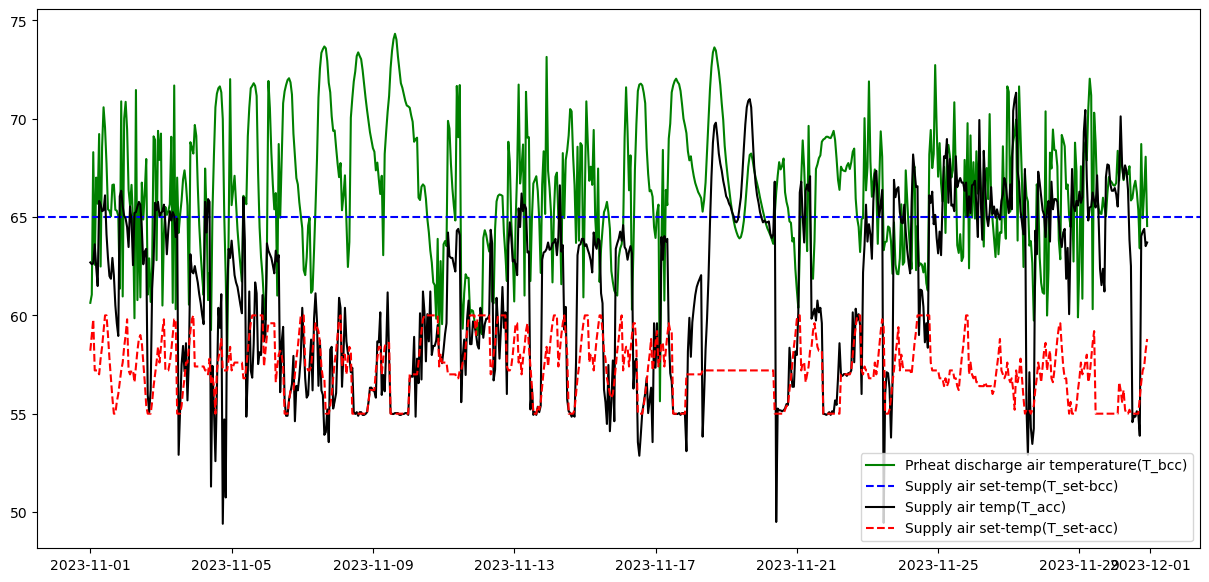

(19662.0, 19691.916666666668)

In [192]:
fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.plot(selected_data_november.index, selected_data_november['AHU-3 AvgPhtTmp'], label='Prheat discharge air temperature(T_bcc)', linestyle='-', color='green') #토출온도
ax1.axhline(y=65, color='blue', linestyle='--', label='Supply air set-temp(T_set-bcc)') #토출온도 설정온도
ax1.plot(selected_data_november.index, selected_data_november['AHU-3 SaTmp'], label='Supply air temp(T_acc)', linestyle='-', color='black') #급기온도
ax1.plot(selected_data_november.index, selected_data_november['AHU-3 SaTmpRstSpt'], label='Supply air set-temp(T_set-acc)', linestyle='--', color='red') #급기온도 설정온도

plt.legend()
plt.show()

ax1.set_ylabel('Temperature (℉)')
ax1.tick_params(axis='y')
ax1.set_xlim(selected_data_november.index.min(), selected_data_november.index.max())

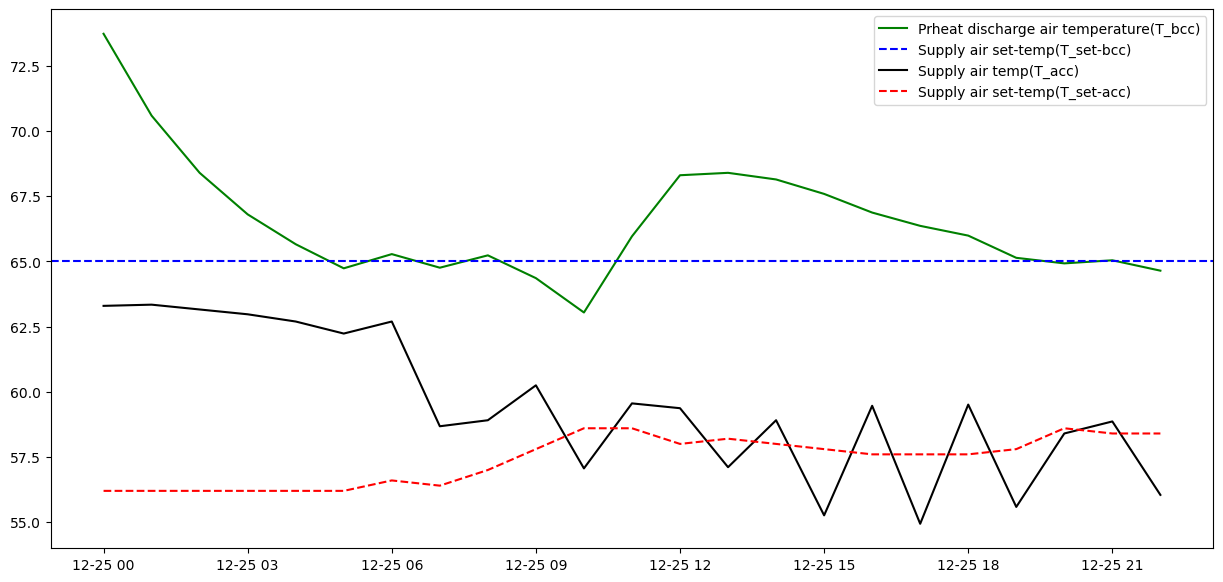

(19716.0, 19716.916666666668)

In [193]:
fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.plot(selected_data_december.index, selected_data_december['AHU-3 AvgPhtTmp'], label='Prheat discharge air temperature(T_bcc)', linestyle='-', color='green') #토출온도
ax1.axhline(y=65, color='blue', linestyle='--', label='Supply air set-temp(T_set-bcc)') #토출온도 설정온도
ax1.plot(selected_data_december.index, selected_data_december['AHU-3 SaTmp'], label='Supply air temp(T_acc)', linestyle='-', color='black') #급기온도
ax1.plot(selected_data_december.index, selected_data_december['AHU-3 SaTmpRstSpt'], label='Supply air set-temp(T_set-acc)', linestyle='--', color='red') #급기온도 설정온도

plt.legend()
plt.show()

ax1.set_ylabel('Temperature (℉)')
ax1.tick_params(axis='y')
ax1.set_xlim(selected_data_december.index.min(), selected_data_december.index.max())

In [194]:
selected_data_week = selected_data.iloc[1151:1318]
selected_data_week2 = selected_data.iloc[719:886]

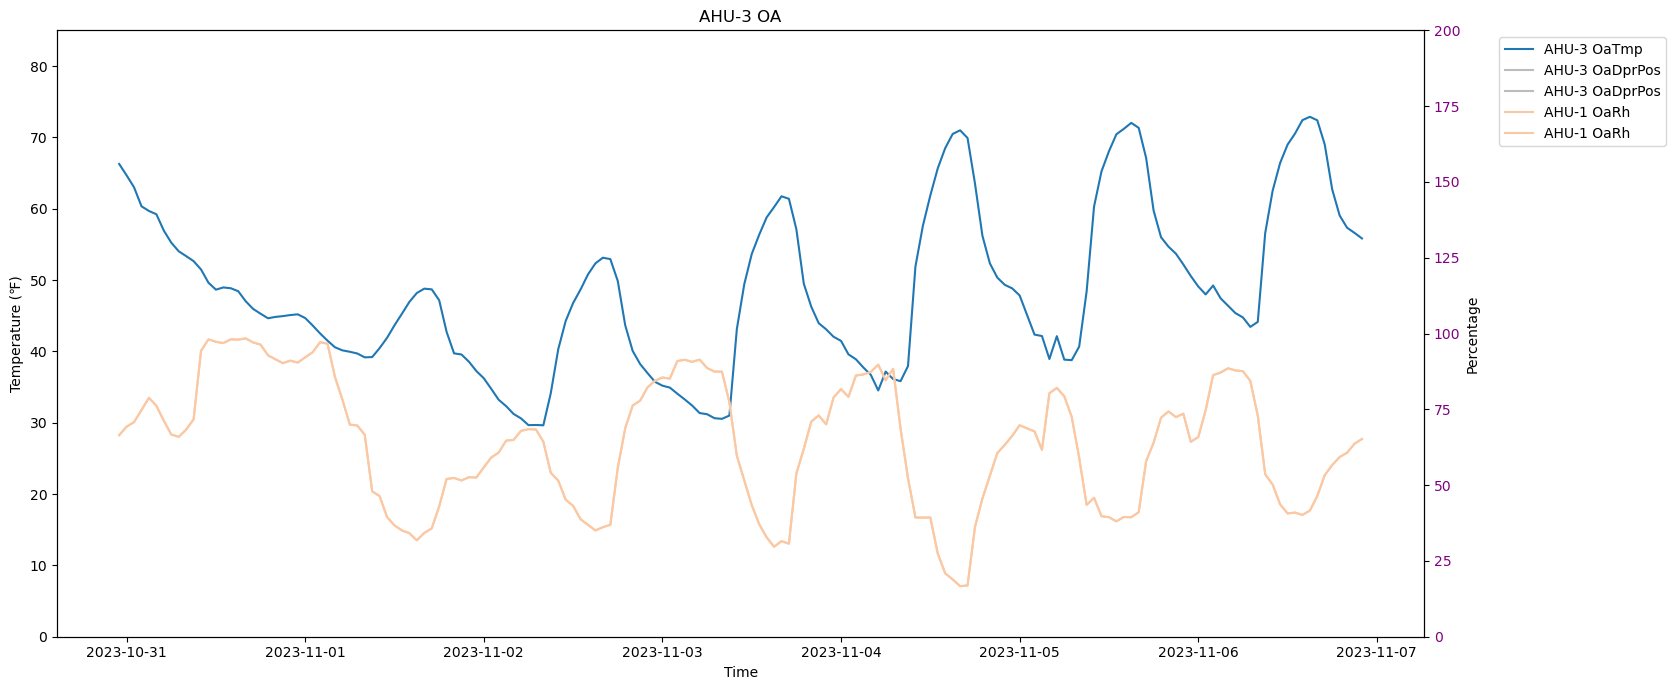

In [195]:
fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.plot(selected_data_week2.index, selected_data_week2['AHU-3 OaTmp'], label='AHU-3 OaTmp', linestyle='-', color='#1f77b4')

ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (℉)')
ax1.tick_params(axis='y')
ax1.set_ylim(0, 85)

# 두 번째 y축 (오른쪽) 설정 및 'C' 열 그래프 그리기
ax2 = ax1.twinx()
ax2.plot(selected_data_week2.index, selected_data_week2['AHU-3 OaDprPos'], label='AHU-3 OaDprPos', linestyle='-', color='#bcbcbc')
ax2.plot(selected_data_week2.index, selected_data_week2['AHU-1 OaRh'], label='AHU-1 OaRh', linestyle='-', color='#fbc8a4')
ax2.set_ylabel('Percentage')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylim(0, 200)

# 그래프 제목 및 범례 설정
plt.title("ABCD Data Plot with Dual Y-Axis")
fig.tight_layout()  # 그래프 레이아웃 조정

# 범례 추가를 위한 준비
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# 범례 표시 (이 부분을 수정)
plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05,1))

plt.title("AHU-3 OA")
plt.xlabel("Time")

plt.show()

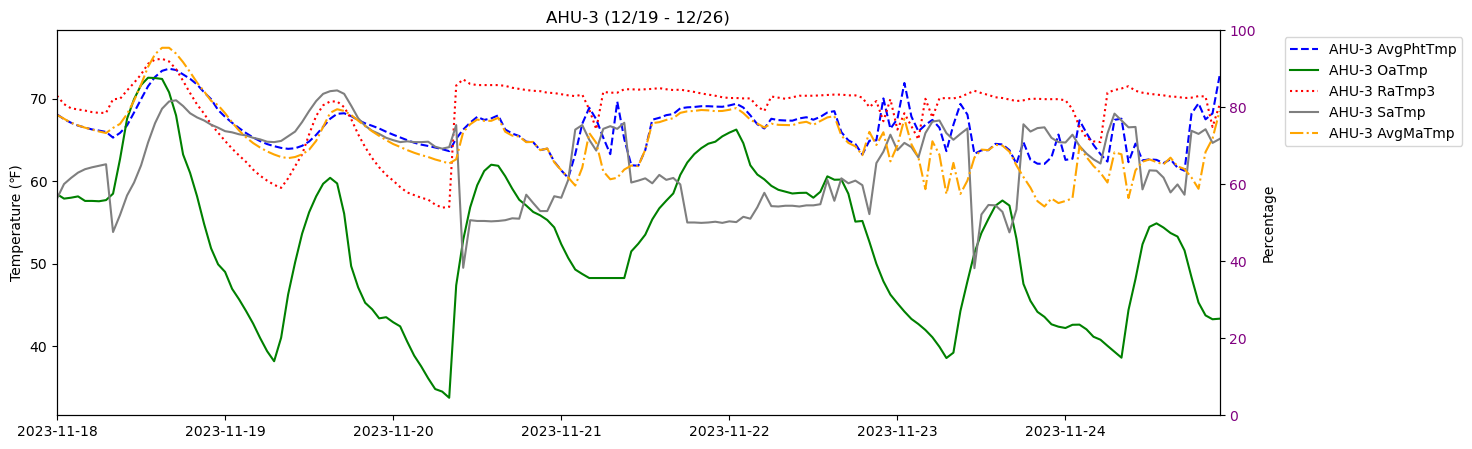

In [196]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax1.plot(selected_data_week.index, selected_data_week['AHU-3 AvgPhtTmp'], label='AHU-3 AvgPhtTmp', linestyle='--', color='blue')
ax1.plot(selected_data_week.index, selected_data_week['AHU-3 OaTmp'], label='AHU-3 OaTmp', linestyle='-', color='green')
ax1.plot(selected_data_week.index, selected_data_week['AHU-3 RaTmp3'], label='AHU-3 RaTmp3', linestyle=':', color='red')
ax1.plot(selected_data_week.index, selected_data_week['AHU-3 SaTmp'], label='AHU-3 SaTmp', linestyle='-', color='#7f7f7f')
ax1.plot(selected_data_week.index, selected_data_week['AHU-3 AvgMaTmp'], label='AHU-3 AvgMaTmp', linestyle='-.', color='orange')

ax1.set_ylabel('Temperature (℉)')
ax1.tick_params(axis='y')
#ax1.set_ylim(0, 100)
ax1.set_xlim(selected_data_week.index.min(), selected_data_week.index.max())

ax2 = ax1.twinx()
#ax2.plot(selected_data_week.index, selected_data_week['AHU-3 PhtVlvPos'], label='AHU-3 PhtVlvPos', linestyle='-', color='#fbc8a4')
#ax2.plot(selected_data_week.index, selected_data_week['AHU-3 ChwVlvPos'], label='AHU-3 ChwVlvPos', linestyle='-', color='#add8e6')
ax2.set_ylabel('Percentage')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylim(0, 100)

# 범례 추가를 위한 준비
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# 범례 표시 (이 부분을 수정)
plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05,1))

plt.title("AHU-3 (12/19 - 12/26)")
plt.xlabel("Time (Month-Day)")

plt.show()

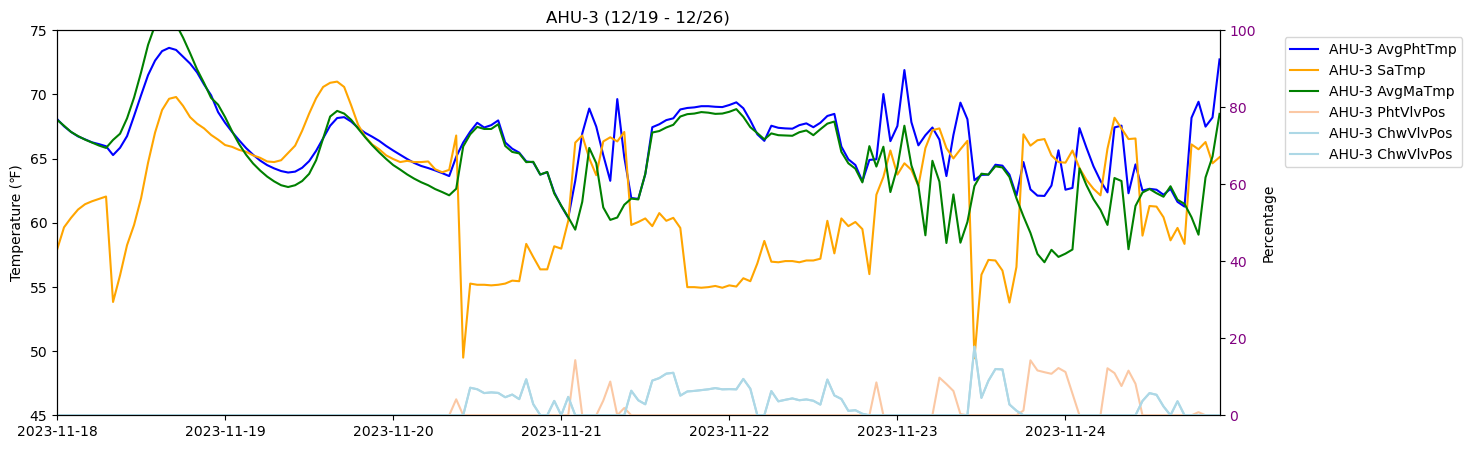

In [197]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax1.plot(selected_data_week.index, selected_data_week['AHU-3 AvgPhtTmp'], label='AHU-3 AvgPhtTmp', linestyle='-', color='blue')
ax1.plot(selected_data_week.index, selected_data_week['AHU-3 SaTmp'], label='AHU-3 SaTmp', linestyle='-', color='orange')
ax1.plot(selected_data_week.index, selected_data_week['AHU-3 AvgMaTmp'], label='AHU-3 AvgMaTmp', linestyle='-', color='green')

ax1.set_ylabel('Temperature (℉)')
ax1.tick_params(axis='y')
ax1.set_ylim(45, 75)
ax1.set_xlim(selected_data_week.index.min(), selected_data_week.index.max())

ax2 = ax1.twinx()
ax2.plot(selected_data_week.index, selected_data_week['AHU-3 PhtVlvPos'], label='AHU-3 PhtVlvPos', linestyle='-', color='#fbc8a4')
ax2.plot(selected_data_week.index, selected_data_week['AHU-3 ChwVlvPos'], label='AHU-3 ChwVlvPos', linestyle='-', color='#add8e6')
ax2.set_ylabel('Percentage')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylim(0, 100)

# 범례 추가를 위한 준비
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# 범례 표시 (이 부분을 수정)
plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05,1))

plt.title("AHU-3 (12/19 - 12/26)")
plt.xlabel("Time (Month-Day)")

plt.show()